# Vinyl-GAN: generative album cover design

We'll start with getting the top 5000 albums and massaging the data into a useable format for our application

We will use rateyourmusic because it has the perfect setup for scraping this information

In [12]:
import urllib
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
ffbinary = FirefoxBinary(r'C:\Program Files\Firefox Developer Edition\firefox.exe')

In [14]:
options = Options()
options.headless = True
options.binary = ffbinary
browser = webdriver.Firefox(options=options)

In [23]:
browser.get("https://rateyourmusic.com/charts/top/album/all-time/")
htmldata = browser.page_source

In [27]:
soup = BeautifulSoup(htmldata, 'html.parser')
vinyl_section = soup.select("#page_charts_section_charts")
print(vinyl_section[0])

<section class="page_section page_charts_section ui_section_nav_marker lazyload-creative-initialized" id="page_charts_section_charts"><div class="page_section_charts_item_wrapper anchor" id="pos1" style="counter-reset:component_charts_counter 1;">
<div class="page_charts_section_charts_item object_release" id="page_charts_section_charts_item_45">
<a aria-label="" class="page_charts_section_charts_item_image_link" href="/release/album/radiohead/ok-computer/">
<picture class="page_charts_section_charts_item_image">
<source srcset="
               //e.snmc.io/i/300/w/819f6c8d9dc68af88e83be0a0ba5d1fb/8862252/Radiohead%20-%20OK%20Computer%2C%20Cover%20art.webp 2x,
               //e.snmc.io/i/300/w/819f6c8d9dc68af88e83be0a0ba5d1fb/8862252/Radiohead%20-%20OK%20Computer%2C%20Cover%20art.webp 1x
            " type="image/webp"/>
<source srcset="
               //e.snmc.io/i/300/s/819f6c8d9dc68af88e83be0a0ba5d1fb/8862252/Radiohead%20-%20OK%20Computer%2C%20Cover%20art.jpeg 2x,
               //e

In [58]:
images = vinyl_section[0].find_all('img')

covers_srcs = {}
for img in images:
    try:
        alttext = img['alt']
    except KeyError:
        continue
    
    src = None
    try:
        src = img['data-src']
    except KeyError:
        src = img['src']

    key = alttext.split(",")[0]
    #print(key)
    covers_srcs[key] = src
    
print(covers_srcs.keys())

dict_keys(['Radiohead - OK Computer', 'Kendrick Lamar - To Pimp a Butterfly', 'Pink Floyd - Wish You Were Here', 'King Crimson - In the Court of the Crimson King', 'Radiohead - Kid A', 'My Bloody Valentine - Loveless', 'Madvillain - Madvillainy', 'Pink Floyd - The Dark Side of the Moon', 'The Beatles - Abbey Road', 'Radiohead - In Rainbows', 'David Bowie - The Rise and Fall of Ziggy Stardust and the Spiders From Mars', 'Kendrick Lamar - good kid', 'The Velvet Underground & Nico - The Velvet Underground & Nico', 'Mingus - The Black Saint and the Sinner Lady', 'Talking Heads - Remain in Light', 'The Beatles - Revolver', 'John Coltrane - A Love Supreme', 'Nas - Illmatic', 'Miles Davis - Kind of Blue', 'Black Sabbath - Paranoid', 'Godspeed You Black Emperor! - Lift Yr. Skinny Fists Like Antennas to Heaven!', 'The Beach Boys - Pet Sounds', 'Wu-Tang Clan - Enter the Wu-Tang (36 Chambers)', 'King Crimson - Red', 'The Cure - Disintegration', 'Neutral Milk Hotel - In the Aeroplane Over the Sea'

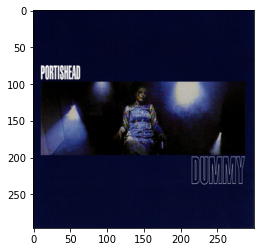

In [59]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

test_record = "Portishead - Dummy"

url = "https:" + covers_srcs[test_record]
response = requests.get(url)
pil_im = Image.open(BytesIO(response.content))
im_array = np.asarray(pil_im)
plt.imshow(im_array)
plt.show()


In [ ]:
covers = {}